# Poverty

In [1]:
from typing import List, Iterable

import censusdis.data as ced

from censusdis.datasets import ACS5_SUBJECT

from censusdis.states import NJ
from censusdis.counties.new_jersey import (
    ATLANTIC,
    CAMDEN,
    CUMBERLAND,
    ESSEX,
    HUDSON,
    MERCER,
    PASSAIC,
)

import censusdis.maps as cem

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter
import matplotlib.patheffects as pe

In [2]:
GROUP_POVERTY_STATUS = "S1701"

VARIABLE_PERCENT_BELOW_POVERTY_WHITE = "S1701_C03_021E"
VARIABLE_PERCENT_BELOW_POVERTY_BLACK = "S1701_C03_014E"
VARIABLE_PERCENT_BELOW_POVERTY_HISPANIC_LATINO = "S1701_C03_020E"

VARIABLES_PERCENT_BELOW_POVERTY = {
    VARIABLE_PERCENT_BELOW_POVERTY_WHITE: "White Poverty Rate",
    VARIABLE_PERCENT_BELOW_POVERTY_BLACK: "Black Poverty Rate",
    VARIABLE_PERCENT_BELOW_POVERTY_HISPANIC_LATINO: "Latina/o Poverty Rate",
}

In [3]:
def download_poverty(**kwargs):
    df = ced.download(
        dataset=ACS5_SUBJECT,
        vintage=2022,
        download_variables=["NAME"] + list(VARIABLES_PERCENT_BELOW_POVERTY.keys()),
        **kwargs
    )

    return df

In [4]:
gdf_counties = download_poverty(state=NJ, county="*", with_geometry=True)

In [5]:
gdf_counties

,STATE,COUNTY,NAME,S1701_C03_021E,S1701_C03_014E,S1701_C03_020E,geometry
0,34,001,"Atlantic County, New Jersey",7.6,20.2,23.1,"POLYGON ((-74.98527 39.51497, -74.95626 39.540..."
1,34,003,"Bergen County, New Jersey",5.1,9.0,11.7,"POLYGON ((-74.27066 41.02103, -74.25046 41.060..."
2,34,005,"Burlington County, New Jersey",4.9,9.3,11.7,"POLYGON ((-75.05965 39.99215, -75.05809 39.997..."
3,34,007,"Camden County, New Jersey",6.7,18.4,24.8,"POLYGON ((-75.13730 39.88997, -75.13541 39.893..."
4,34,009,"Cape May County, New Jersey",7.6,16.9,19.1,"POLYGON ((-74.97191 38.94058, -74.97043 38.944..."
5,34,011,"Cumberland County, New Jersey",8.8,25.0,20.2,"POLYGON ((-75.41956 39.41325, -75.41830 39.415..."
6,34,013,"Essex County, New Jersey",6.1,20.2,20.7,"POLYGON ((-74.37727 40.76118, -74.37576 40.762..."
7,34,015,"Gloucester County, New Jersey",5.9,16.0,13.9,"POLYGON ((-75.42830 39.78437, -75.42168 39.787..."
8,34,017,"Hudson County, New Jersey",9.7,18.8,18.2,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."
9,34,019,"Hunterdon County, New Jersey",3.2,8.9,6.4,"POLYGON ((-75.19511 40.57969, -75.19466 40.581..."


## Compare to NJISJ Report

### Figure 8

In [6]:
def plot_over_10(gdf, var, color, **kwargs):

    ax = gdf[gdf[var] >= 10].plot(color=color, **kwargs)

    ax = gdf.boundary.plot(color="black", ax=ax)

    for _, row in gdf.iterrows():
        rep = row["geometry"].representative_point()

        name = row["NAME"].split(" County, ")[0]

        ax.text(
            rep.x,
            rep.y,
            f"{name}",
            ha="center",
            va="center",
            color="#333",
            size=9,
            path_effects=[pe.withStroke(linewidth=4, foreground="white")],
        )

    ax.set_axis_off()

    return ax

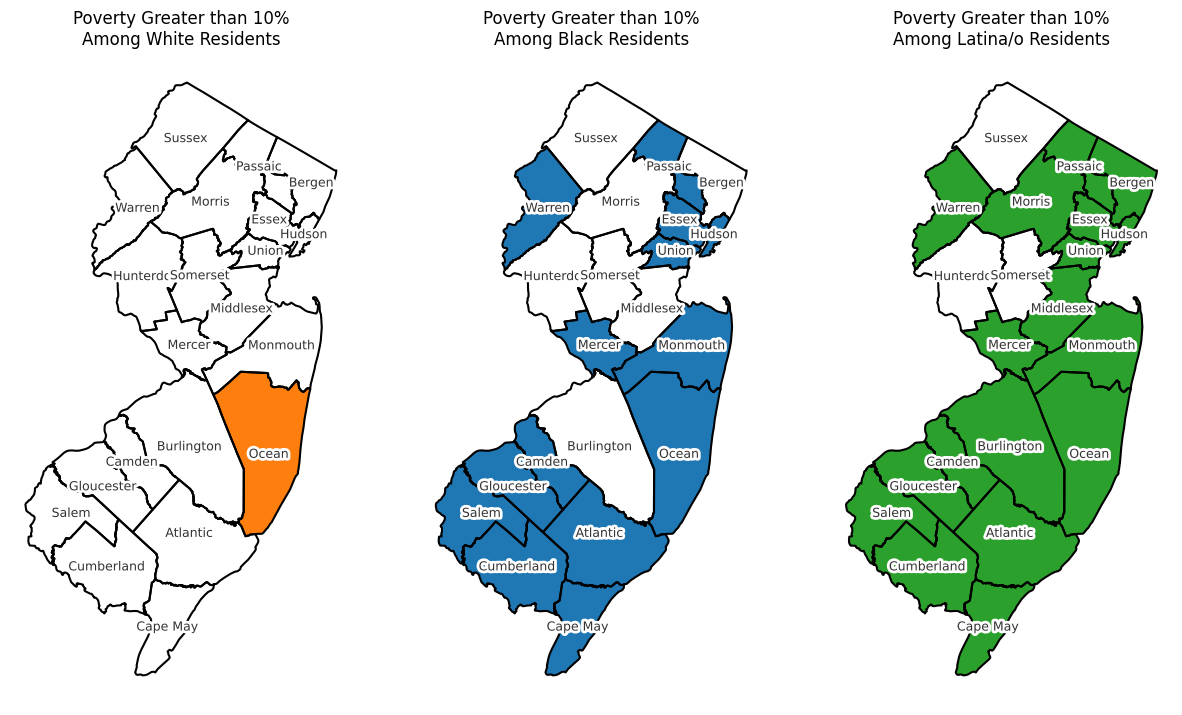

In [7]:
figs, axes = plt.subplots(1, 3, figsize=(15, 10))

ax = plot_over_10(gdf_counties, VARIABLE_PERCENT_BELOW_POVERTY_WHITE, "C1", ax=axes[0])
ax.set_title("Poverty Greater than 10%\nAmong White Residents")

ax = plot_over_10(gdf_counties, VARIABLE_PERCENT_BELOW_POVERTY_BLACK, "C0", ax=axes[1])
ax.set_title("Poverty Greater than 10%\nAmong Black Residents")

ax = plot_over_10(
    gdf_counties, VARIABLE_PERCENT_BELOW_POVERTY_HISPANIC_LATINO, "C2", ax=axes[2]
)
_ = ax.set_title("Poverty Greater than 10%\nAmong Latina/o Residents")

### NJISJ Figure 9

In [8]:
df_notable_counties = pd.DataFrame(
    gdf_counties[
        gdf_counties["COUNTY"].isin(
            [
                ATLANTIC,
                CAMDEN,
                CUMBERLAND,
                ESSEX,
                HUDSON,
                MERCER,
                PASSAIC,
            ]
        )
    ][["NAME"] + list(VARIABLES_PERCENT_BELOW_POVERTY.keys())]
)

df_notable_counties["NAME"] = df_notable_counties["NAME"].map(
    lambda v: v.split(", ")[0].replace(" ", "\n")
)

df_notable_counties.set_index("NAME", inplace=True)

df_notable_counties.rename(
    VARIABLES_PERCENT_BELOW_POVERTY, axis="columns", inplace=True
)

df_notable_counties

,White Poverty Rate,Black Poverty Rate,Latina/o Poverty Rate
NAME,,,
Atlantic\nCounty,7.6,20.2,23.1
Camden\nCounty,6.7,18.4,24.8
Cumberland\nCounty,8.8,25.0,20.2
Essex\nCounty,6.1,20.2,20.7
Hudson\nCounty,9.7,18.8,18.2
Mercer\nCounty,6.1,19.9,16.9
Passaic\nCounty,5.8,19.4,19.6


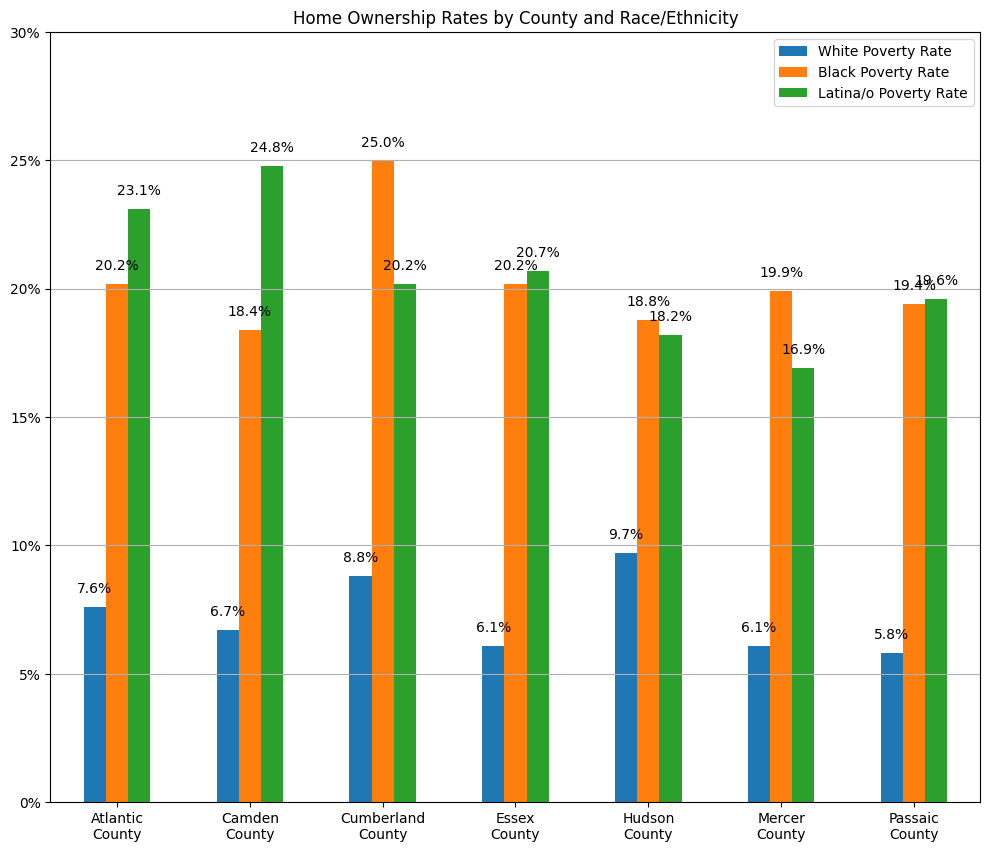

In [9]:
ax = df_notable_counties.plot.bar(figsize=(12, 10))

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{x:,.1f}%", padding=8)

ax.set_title("Home Ownership Rates by County and Race/Ethnicity")

ax.yaxis.set_major_formatter(PercentFormatter(100, 0))
ax.set_ylim(0, 30.0)
ax.yaxis.grid()

ax.set_xticklabels(df_notable_counties.index, rotation=0)
_ = ax.set_xlabel(None)

## SoMa

In [10]:
gdf_soma_tracts = download_poverty(
    state=NJ,
    county=ESSEX,
    tract="*",
    download_contained_within={
        "zip_code_tabulation_area": ["07079", "07040"],
    },
    with_geometry=True,
)

In [11]:
gdf_soma_tracts

,ZIP_CODE_TABULATION_AREA,STATE,COUNTY,TRACT,NAME,S1701_C03_021E,S1701_C03_014E,S1701_C03_020E,geometry
0,07079,34,013,019000,Census Tract 190; Essex County; New Jersey,3.5,1.2,4.8,"POLYGON ((-74.28311 40.74787, -74.28183 40.749..."
1,07079,34,013,019100,Census Tract 191; Essex County; New Jersey,0.3,1.4,3.0,"POLYGON ((-74.26040 40.75434, -74.25754 40.758..."
2,07079,34,013,019200,Census Tract 192; Essex County; New Jersey,22.5,9.5,12.0,"POLYGON ((-74.26127 40.73672, -74.26020 40.739..."
3,07079,34,013,019300,Census Tract 193; Essex County; New Jersey,6.2,8.9,10.3,"POLYGON ((-74.27039 40.74328, -74.26731 40.745..."
4,07040,34,013,019400,Census Tract 194; Essex County; New Jersey,2.3,0.0,0.0,"POLYGON ((-74.29266 40.75272, -74.29214 40.756..."
5,07040,34,013,019500,Census Tract 195; Essex County; New Jersey,0.9,6.1,0.0,"POLYGON ((-74.27182 40.73109, -74.27125 40.732..."
6,07040,34,013,019600,Census Tract 196; Essex County; New Jersey,12.6,3.2,1.4,"POLYGON ((-74.25869 40.73079, -74.25777 40.732..."
7,07040,34,013,019700,Census Tract 197; Essex County; New Jersey,0.3,3.3,0.0,"POLYGON ((-74.27240 40.72030, -74.27027 40.720..."
8,07040,34,013,019800,Census Tract 198; Essex County; New Jersey,1.0,8.7,6.3,"POLYGON ((-74.28533 40.72272, -74.28234 40.722..."
9,07040,34,013,019900,Census Tract 199; Essex County; New Jersey,2.4,57.5,3.4,"POLYGON ((-74.28891 40.73635, -74.28624 40.739..."


### Figure 8 - SoMa's Version

In [12]:
# Pop in just the tract number.
gdf_soma_tracts["NAME"] = gdf_soma_tracts["TRACT"]

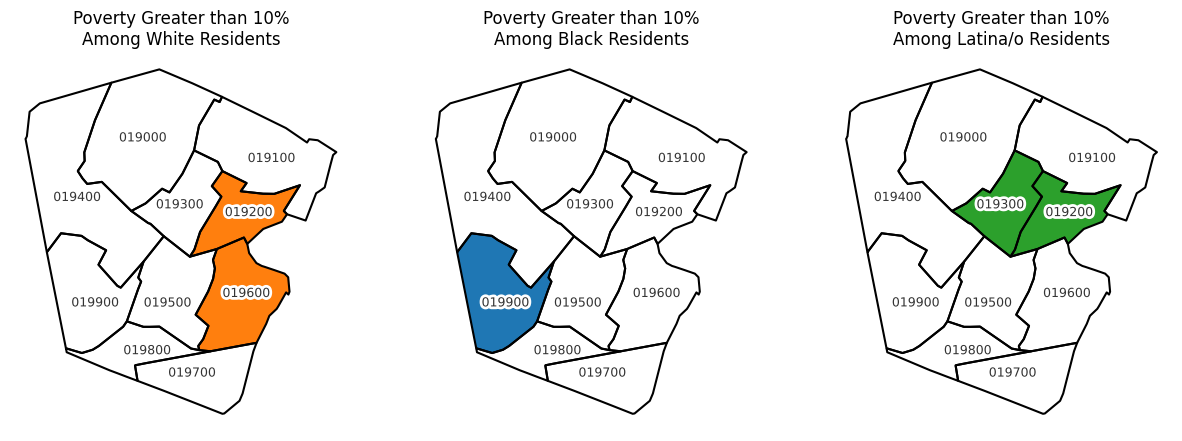

In [13]:
figs, axes = plt.subplots(1, 3, figsize=(15, 6))

ax = plot_over_10(
    gdf_soma_tracts, VARIABLE_PERCENT_BELOW_POVERTY_WHITE, "C1", ax=axes[0]
)
ax.set_title("Poverty Greater than 10%\nAmong White Residents")

ax = plot_over_10(
    gdf_soma_tracts, VARIABLE_PERCENT_BELOW_POVERTY_BLACK, "C0", ax=axes[1]
)
ax.set_title("Poverty Greater than 10%\nAmong Black Residents")

ax = plot_over_10(
    gdf_soma_tracts, VARIABLE_PERCENT_BELOW_POVERTY_HISPANIC_LATINO, "C2", ax=axes[2]
)
_ = ax.set_title("Poverty Greater than 10%\nAmong Latina/o Residents")